In [1]:
%load_ext nb_black

import pymc3 as pm
import pandas as pd
import numpy as np
import pickle
import gzip
from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(context="talk", style="ticks", color_codes=True, rc={"legend.frameon": False})

%matplotlib inline

/Users/zuck016/.pyenv/versions/anaconda3-2020.11/envs/idp_new/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<IPython.core.display.Javascript object>

In [2]:
with gzip.open("model.pz", "rb") as f:
    pymc_model = pickle.load(f)

<IPython.core.display.Javascript object>

In [4]:
with gzip.open("model_data.pz", "rb") as f:
    data = pickle.load(f)
    ll = data["ll"]

Using license file /Users/zuck016/gurobi.lic
Set parameter TokenServer to value leghorn.emsl.pnl.gov
Read LP format model from file /var/folders/z1/nhct2gps3y94tkbwqvvd7y_jw6p1l8/T/tmp447c6hno.lp
Reading time = 0.01 seconds
: 171 rows, 344 columns, 1240 nonzeros


<IPython.core.display.Javascript object>

In [5]:
advi_file = "output_A.niger_advi_20k.pgz"

<IPython.core.display.Javascript object>

WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.
WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.


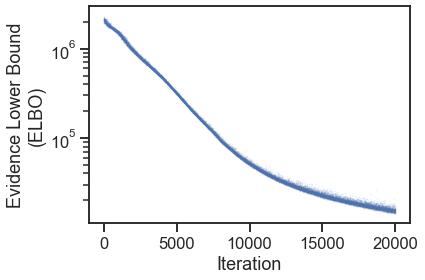

<IPython.core.display.Javascript object>

In [6]:
with gzip.open(advi_file, "rb") as f:
    results = pickle.load(f)
    approx = results["approx"]
    hist = results["hist"]
    trace = results["trace"]

plt.semilogy(hist.hist, ".", ms=1, alpha=0.1)

plt.ylabel("Evidence Lower Bound\n(ELBO)")
plt.xlabel("Iteration")

plt.tight_layout()
plt.savefig("elbo.svg")

# with gzip.open('results_0.0025.pz', 'rb') as f:
#     results = pickle.load(f)
#     approx = results['approx']
#     hist5 = results['hist']

# plt.semilogy(hist5.hist, '.', ms=1, alpha=.1)

# plt.ylim([2E5, 4E5])

# plt.ylim([2E5, 4E5])

In [6]:
exchange_fluxes = [
    "EX_3hpp_e",
    "BAPAT",
    "HPDH",
    "ALD6",
    "3HPPt",
    "BOUNDARY_GLCe",
]

<IPython.core.display.Javascript object>

In [12]:
data["vn"]

,r1,r5a,r6,r7,r8,r9,r10,r12a,r13a,r14,...,r2818,r2819,r2820,r2821,r2847,BAPAT,HPDH,ALD6,3HPPt,EX_3hpp_e
SF ABF93_1-R1,0.700464,20.737453,11.769654,4.765014,3.502320,8.267334,3.656998,3.656998,3.656998,19.764976,...,5.470874,5.470874,5.470874,5.470874,3.299685,5.167330,0.000000,5.167330,-0.000000,0.000000
SF ABF93_1-R2,0.702898,20.887653,11.849623,4.820642,3.514490,8.335133,3.671577,3.671577,3.671577,19.863872,...,5.512430,5.512430,5.512430,5.512430,3.286112,5.037285,0.000000,5.037285,-0.000000,0.000000
SF ABF93_1-R3,0.681880,20.884047,11.805783,4.986987,3.409398,8.396385,3.629256,3.629256,3.629256,19.683388,...,5.521629,5.521629,5.521629,5.521629,3.356245,5.175018,0.000000,5.175018,-0.000000,0.000000
SF ABF93_10-R1,0.539011,22.412231,12.284136,6.894031,2.695053,9.589084,4.575560,4.575560,4.575560,19.736560,...,4.160225,4.160225,4.160225,4.160225,4.564006,11.849184,8.200368,3.648816,8.200368,8.200368
SF ABF93_10-R2,0.491422,22.355528,12.160608,7.246388,2.457110,9.703498,5.052446,5.052446,5.052446,19.896555,...,3.954445,3.954445,3.954445,3.954445,5.006462,12.860283,9.273390,3.586893,9.273390,9.273390
SF ABF93_10-R3,0.554093,22.284664,12.250517,6.709592,2.770463,9.480054,4.245004,4.245004,4.245004,19.643836,...,4.233508,4.233508,4.233508,4.233508,4.276142,11.228880,7.726842,3.502038,7.726842,7.726842
SF ABF93_11-R1,0.622975,21.663565,12.077733,5.847979,3.114877,8.962856,4.096401,4.096401,4.096401,19.821788,...,4.438751,4.438751,4.438751,4.438751,3.891985,9.574800,5.896979,3.677821,5.896979,5.896979
SF ABF93_11-R2,0.615275,21.875902,12.168502,6.015747,3.076377,9.092125,4.150629,4.150629,4.150629,19.909616,...,4.536400,4.536400,4.536400,4.536400,3.942277,9.595030,5.753339,3.841691,5.753339,5.753339
SF ABF93_11-R3,0.611794,21.756982,12.102078,5.984143,3.058968,9.043110,4.152017,4.152017,4.152017,19.904789,...,4.489567,4.489567,4.489567,4.489567,3.942677,9.595100,5.833698,3.761402,5.833698,5.833698
SF ABF93_12-R1,0.557263,22.336103,12.282579,6.709944,2.786317,9.496261,4.541604,4.541604,4.541604,19.877249,...,4.155769,4.155769,4.155769,4.155769,4.442921,11.692658,8.115986,3.576672,8.115986,8.115986


<IPython.core.display.Javascript object>

In [7]:
data["vn"] = data["vn"][
    exchange_fluxes
]  # ['biomass', 'glucose', 'fructose', 'gluconate', '2-ketogluconate', 'muconate']

<IPython.core.display.Javascript object>

IndexError: list index out of range

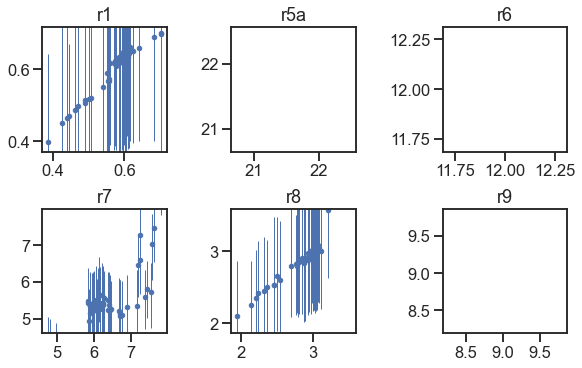

<IPython.core.display.Javascript object>

In [7]:
fig = plt.figure(constrained_layout=True, figsize=(18, 5))
gs = fig.add_gridspec(2, 7)

ax_fluxes = [
    fig.add_subplot(gs[i, j], aspect="equal") for i in range(2) for j in range(3)
]
vn_model = results["trace"]["vn_ss"][:, :, data["v_inds"]]

for i, (name, df) in enumerate(data["vn"].iteritems()):
    ax = ax_fluxes[i]
    model_mean = vn_model[:, :, i].mean(0)
    model_hpd = pm.hpd(vn_model[:, :, i])

    ax.errorbar(
        df,
        model_mean,
        yerr=np.abs(model_hpd - model_mean[:, np.newaxis]).T,
        marker=".",
        ls="",
        label=name,
        elinewidth=1,
    )

    ax.set_ylim(ax.get_xlim())

    ax.set_title(name)

ax_xn = fig.add_subplot(gs[:, 3:5], aspect="equal")
ax_xn.plot(
    data["xn"], results["trace"]["chi_ss"][:, :, data["x_inds"]].mean(0), ".", ms=1
)
ax_xn.set_xlim([-5, 5])
ax_xn.set_ylim([-5, 5])
ax_xn.set_title("Metabolomics (log transformed)")
ax_xn.set_ylabel("Regressed")
ax_xn.set_xlabel("Measured")

ax_en = fig.add_subplot(gs[:, 5:], aspect="equal")
ax_en.plot(
    data["en"],
    results["trace"]["log_en_t"][:, :, data["e_inds"]].mean(0),
    ".",
    ms=1,
    rasterized=True,
)
ax_en.set_xlim([-5, 5])
ax_en.set_ylim([-5, 5])
ax_en.set_title("Proteomics (log transformed)")
ax_en.set_ylabel("Regressed")
ax_en.set_xlabel("Measured")

plt.tight_layout()
sns.despine(offset=5)

plt.savefig(
    "regression_figures.svg"
)  # "20210908_abf_q4_milestone/putida_figs/regression_figures.svg")

In [8]:
with pymc_model:
    trace_prior = pm.sample_prior_predictive(samples=50)

TypeError: Attempted to generate values with incompatible shapes:
            size: 50
            dist_shape: ()
            broadcast_shape: (50, 50, 172)
        

<IPython.core.display.Javascript object>

In [14]:
fcc = pd.DataFrame(
    np.array(
        [
            ll.flux_control_coefficient(Ex=ex)[data["r_labels"].index("EX_3hpp_e")]
            for ex in tqdm(trace["Ex"])
        ]
    ),
    columns=data["r_labels"],
)

fcc_prior = pd.DataFrame(
    np.array(
        [
            ll.flux_control_coefficient(Ex=ex)[data["r_labels"].index("EX_3hpp_e")]
            for ex in tqdm(trace_prior["Ex"])
        ]
    ),
    columns=data["r_labels"],
)

100%|██████████| 500/500 [00:33<00:00, 14.87it/s]


NameError: name 'trace_prior' is not defined

<IPython.core.display.Javascript object>

In [15]:
fcc  # = fcc.rename(columns={'Biomass_Ecoli_core_w_GAM': "Biomass"})

,r1,r5a,r6,r7,r8,r9,r10,r12a,r13a,r14,...,r2818,r2819,r2820,r2821,r2847,BAPAT,HPDH,ALD6,3HPPt,EX_3hpp_e
0,-0.000141,0.003132,0.000485,-0.011061,0.005710,0.003306,0.104507,0.058873,0.022482,0.026257,...,-0.012139,-0.002833,-0.002316,-0.024295,0.011456,-0.017636,0.046516,-0.336992,0.045461,0.056220
1,-0.000428,0.001324,0.002895,-0.004914,0.003739,0.005487,0.087198,0.063138,0.035036,0.004859,...,-0.007695,-0.007231,-0.001158,-0.012770,0.015067,-0.013512,0.016360,-0.394989,0.016021,0.051735
2,-0.000940,0.000778,0.006485,-0.021770,0.012597,0.011046,0.079754,0.063722,0.031470,0.022548,...,-0.021159,-0.003439,0.002381,-0.024321,0.016607,-0.010745,0.039236,-0.361456,0.051305,0.060542
3,-0.000876,0.003830,0.006606,-0.027280,0.014988,0.011176,0.111420,0.056193,0.023395,0.002927,...,-0.007082,-0.005067,-0.007158,-0.003220,0.009991,-0.010495,0.026169,-0.368283,0.036933,0.045260
4,0.000124,0.013663,0.003588,-0.034596,0.015053,0.000954,0.117094,0.042237,0.016686,0.002790,...,-0.013039,-0.005503,-0.006348,-0.014394,0.012200,0.002312,0.058129,-0.337252,0.048521,0.071954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-0.000403,0.001257,0.001599,-0.003297,0.003211,0.006030,0.114102,0.068675,0.022429,0.004011,...,-0.008430,0.000341,-0.000428,-0.010261,0.014418,-0.016461,0.028183,-0.384408,0.032286,0.059368
496,-0.000272,0.003319,0.001645,-0.016692,0.008525,0.004679,0.071205,0.059413,0.056323,0.003398,...,-0.014463,-0.003137,-0.004007,-0.014710,0.007041,-0.015066,0.022188,-0.334238,0.020757,0.072828
497,0.000794,0.010336,-0.007688,-0.018011,0.006799,-0.002971,0.093196,0.068854,0.021910,0.007629,...,-0.009483,-0.004196,-0.009000,-0.012550,0.019120,-0.013748,0.024343,-0.370084,0.033007,0.060724
498,0.000929,0.002770,-0.005403,0.002843,-0.004264,-0.010199,0.076751,0.071885,0.055473,0.011481,...,-0.013532,-0.004040,-0.011540,-0.016941,0.010148,-0.003153,0.033437,-0.322151,0.079988,0.056323


<IPython.core.display.Javascript object>

In [16]:
fcc_sort = fcc.reindex(columns=fcc.median().sort_values().index)
# fcc_prior_sort = fcc_prior.reindex(columns=fcc.median().sort_values().index)

# Calculate the fcc values that have 95% Highest Posterior Densities with a consistent direction.
hpd = pm.hpd(fcc_sort.values)
# hpd_prior = pm.hpd(fcc_prior_sort.values)

fcc_consistent = np.sign(hpd[:, 0]) == np.sign(hpd[:, 1])

<IPython.core.display.Javascript object>

In [32]:
np.sum(fcc_consistent)

59

<IPython.core.display.Javascript object>

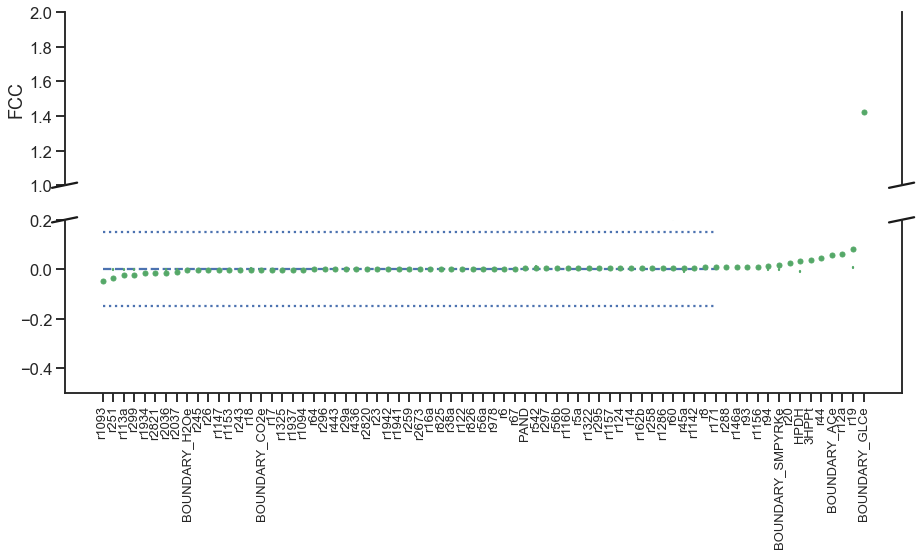

<IPython.core.display.Javascript object>

In [72]:
# fig = plt.figure(figsize=(7,3))
f, (ax, ax2) = plt.subplots(2, 1, sharex=True, figsize=(15, 7))

j = 0
for i, row in enumerate(hpd):

    if not fcc_consistent[i]:
        continue

    ax.plot([j, j], [row[0], row[1]], color="g")
    ax.plot(j, fcc_sort.iloc[:, i].median(), color="g", marker="o", ms=5)
    ax2.plot([j, j], [row[0], row[1]], color="g")
    ax2.plot(j, fcc_sort.iloc[:, i].median(), color="g", marker="o", ms=5)

    j += 1
ax2.hlines(y=[0], xmin=0, xmax=58, linestyles="dashed")
ax2.hlines(y=[-0.15, 0.15], xmin=0, xmax=58, linestyles="dotted")

ax.set_ylim([1, 2])
ax2.set_ylim([-0.5, 0.2])

sns.despine(right=False)

# hide the spines between ax and ax2
ax.spines["bottom"].set_visible(False)
ax2.spines["top"].set_visible(False)
ax.xaxis.set_visible(False)
# ax.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

d = 0.015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color="k", clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)  # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

_ = ax2.set_xticks(np.arange(sum(fcc_consistent)))
_ = ax2.set_xticklabels(fcc_sort.columns[fcc_consistent], rotation=90, fontsize=13)

ax.set_ylabel("FCC")

plt.savefig("fcc_consistent_credible_intervals.svg")

In [40]:
import matplotlib as mpl
import matplotlib.cm as cm

import cobra
import d3flux as d3f

model = cobra.io.load_json_model(
    "../../../Models/iJB1325_HP.nonnative_genes.pubchem.flipped.nonzero.reduced.json"
)

# for rxn in model.metabolites.fum_c.reactions:
#    rxn *= -1
# model.reactions.PGI *= -1

norm = mpl.colors.Normalize(vmin=-0.1, vmax=0.1)
cmap = cm.PuOr
m = cm.ScalarMappable(norm=norm, cmap=cmap)


def val2hex(fcc):
    """Convert from a [-1, 1] float to the corresponding color,
    with a gray for NaN's"""
    if np.isnan(fcc):
        return "#000000"
    return mpl.colors.rgb2hex(m.to_rgba(fcc))


for rxn in model.reactions:
    if rxn.id in fcc.columns:
        rxn.notes["map_info"] = {}
        rxn.notes["map_info"]["color"] = val2hex(fcc[rxn.id].median())

<IPython.core.display.Javascript object>

In [41]:
for rxn in model.reactions:
    if rxn.id not in data["r_labels"]:
        rxn.knock_out()

<IPython.core.display.Javascript object>

In [42]:
d3f.flux_map(
    model, flux_dict={r: flux for r, flux in zip(data["r_labels"], data["v_star"])}
)

<IPython.core.display.Javascript object>

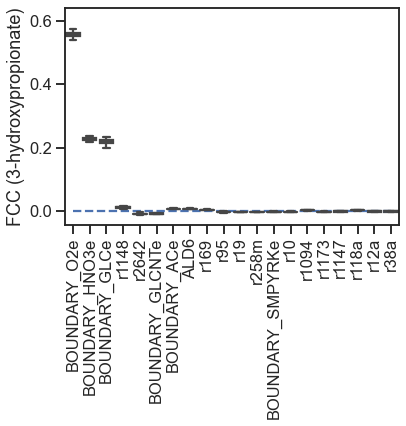

<IPython.core.display.Javascript object>

In [76]:
sns.boxplot(
    x="variable",
    y="value",
    data=fcc.loc[:, fcc_consistent].melt(),
    order=fcc.loc[:, fcc_consistent]
    .median()
    .abs()
    .sort_values(ascending=False)
    .index[:20],
    fliersize=0,
)
plt.hlines([0], 0, 19, linestyles="dashed")
plt.xticks(rotation=90)
plt.xlabel(None)
plt.ylabel("FCC (3-hydroxypropionate)")

plt.savefig("fcc_3hp_sorted.svg")


 31%|███       | 155/500 [00:18<00:41,  8.22it/s]


 62%|██████▏   | 309/500 [00:37<00:23,  8.06it/s]


 93%|█████████▎| 463/500 [00:58<00:04,  7.47it/s]


100%|██████████| 500/500 [01:03<00:00,  7.86it/s]


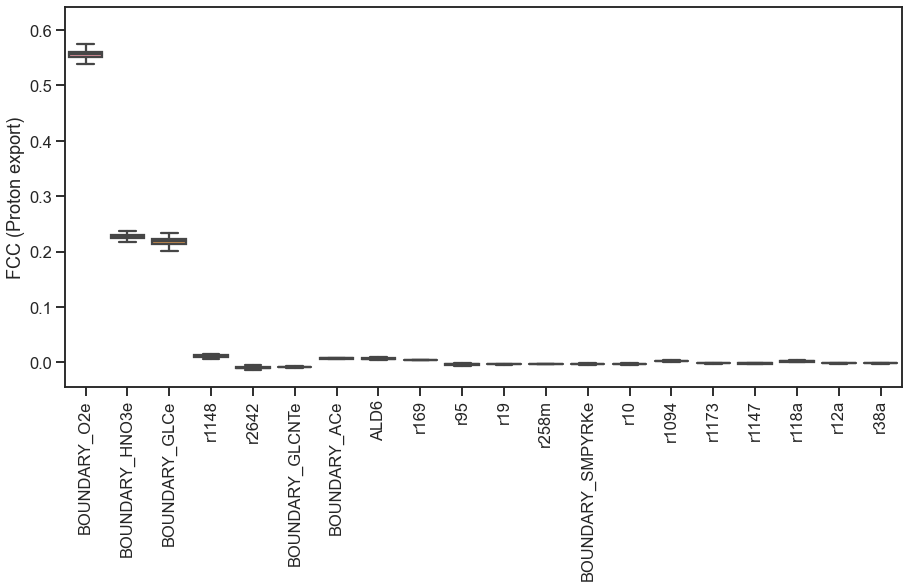

<IPython.core.display.Javascript object>

In [59]:
fcc = pd.DataFrame(
    np.array(
        [
            ll.flux_control_coefficient(Ex=ex)[data["r_labels"].index("BOUNDARY_He")]
            for ex in tqdm(trace["Ex"])
        ]
    ),
    columns=data["r_labels"],
)

# fcc_prior = pd.DataFrame(np.array([ll.flux_control_coefficient(Ex=ex)[data['r_labels'].index('Biomass_Ecoli_core_w_GAM')]
#                                   for ex in tqdm(trace_prior['Ex'])]), columns=data['r_labels'])

# Calculate the fcc values that have 95% Highest Posterior Densities with a consistent direction.
hpd = pm.hpd(fcc.values)
fcc_consistent = np.sign(hpd[:, 0]) == np.sign(hpd[:, 1])

plt.figure(figsize=(15, 7))
sns.boxplot(
    x="variable",
    y="value",
    data=fcc.loc[:, fcc_consistent].melt(),
    order=fcc.loc[:, fcc_consistent]
    .median()
    .abs()
    .sort_values(ascending=False)
    .index[:20],
    fliersize=0,
)

plt.xticks(rotation=90)
plt.xlabel(None)
plt.ylabel("FCC (Proton export)")

plt.savefig("fcc_proton.svg")

In [54]:
fcc.shape

(500, 172)

<IPython.core.display.Javascript object>

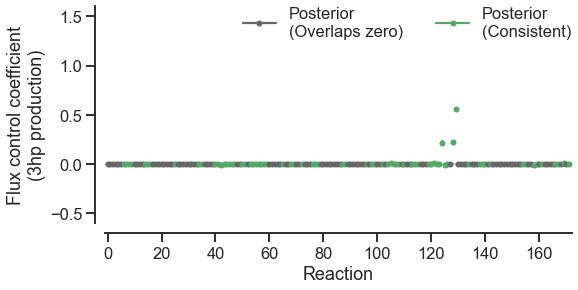

<IPython.core.display.Javascript object>

In [77]:
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111)

for i, (name, col) in enumerate(fcc.iteritems()):

    if name in fcc.columns[fcc_consistent]:
        color = "g"

        l_g = ax.plot([i, i], pm.hpd(col), color=color)
        dot_g = ax.plot(i, col.median(), ".", color=color, ms=10)

    else:
        color = ".4"

        l_4 = ax.plot([i, i], pm.hpd(col), color=color)
        dot_4 = ax.plot(i, col.median(), ".", color=color, ms=10)

    # l_p = ax.plot([i, i], pm.hpd(fcc_prior[name]), color=".8", zorder=0)


ax.axhline(0, ls="--", color=".8", zorder=0)

# ax.set_ylim([-5E-5, 1E-4])
# ax.set_xlim([-1, 16])

plt.ticklabel_format(axis="y", style="sci", scilimits=(-2, 2))
ax.set_ylabel("Flux control coefficient\n(3hp production)")

ax.set_xlabel("Reaction")

plt.legend(
    (
        # l_p[0],
        (l_4[0], dot_4[0]),
        (l_g[0], dot_g[0]),
    ),
    # ("Prior",
    ("Posterior\n(Overlaps zero)", "Posterior\n(Consistent)"),
    borderaxespad=0,
    borderpad=0,
    ncol=3,
)


xs = np.where(fcc_consistent)[0]
ys = fcc.loc[:, fcc_consistent].mean(0).values
labels = fcc.columns[fcc_consistent]

plt.ylim([-0.6, 1.6])
plt.xlim([-1, ll.nr])
plt.tight_layout()

sns.despine(trim=False, offset=10)
plt.savefig("fccs_plot.svg", transparent=True)

In [79]:
pd.set_option("display.max_rows", 73)

fcc.loc[:, fcc_consistent].median().to_frame("FCC").sort_values(
    by="FCC", ascending=False
)

,FCC
BOUNDARY_O2e,0.556061
BOUNDARY_HNO3e,0.226974
BOUNDARY_GLCe,0.218810
r1148,0.011195
BOUNDARY_ACe,0.006807
ALD6,0.006615
r169,0.004246
r1094,0.002220
r118a,0.001757
r262,0.001438


<IPython.core.display.Javascript object>